In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [4]:
categorical_cols = ['furnishingstatus', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')


In [5]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [8]:
print("Model Evaluation")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.4f}")

Model Evaluation
Mean Absolute Error: 970043.40
Mean Squared Error: 1754318687330.66
R-squared: 0.6529


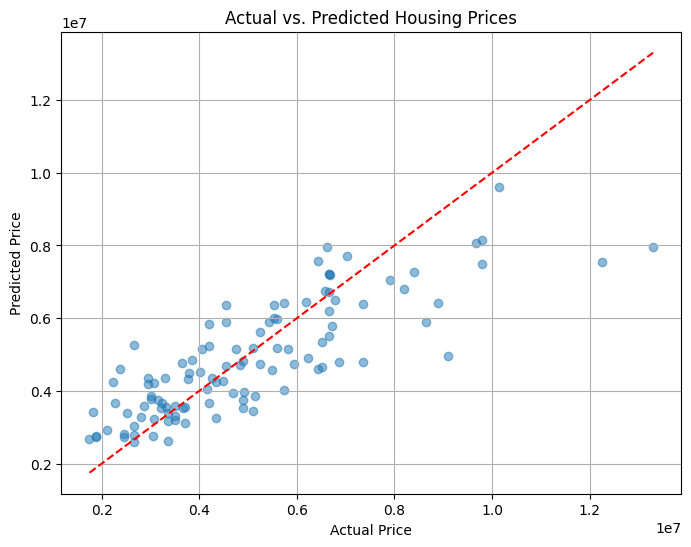

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Housing Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

In [10]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5   furnishingstatus_semi-furnished -1.268818e+05
6      furnishingstatus_unfurnished -4.136451e+05
7                      mainroad_yes  3.679199e+05
8                     guestroom_yes  2.316100e+05
9                      basement_yes  3.902512e+05
10              hotwaterheating_yes  6.846499e+05
11              airconditioning_yes  7.914267e+05
12                     prefarea_yes  6.298906e+05
